In [ ]:
import pandas as pd
import numpy as np


demo = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Ironhack /Week 5 - EDA/Project/df_final_demo.txt")
exp  = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Ironhack /Week 5 - EDA/Project/df_final_experiment_clients.txt')
pt1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Ironhack /Week 5 - EDA/Project/df_final_web_data_pt_1.txt')
pt2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Ironhack /Week 5 - EDA/Project/df_final_web_data_pt_2.txt')
web  = pd.concat([pt1,pt2]).drop_duplicates()


demo["client_id"] = demo["client_id"].astype(str).str.strip()
exp["client_id"]  = exp["client_id"].astype(str).str.strip()
web["client_id"]  = web["client_id"].astype(str).str.strip()
web["process_step"] = web["process_step"].astype(str).str.lower().str.strip()
web["date_time"] = pd.to_datetime(web["date_time"], errors="coerce")

clientid = demo.merge(exp, on='client_id')
exp_test = clientid[clientid['Variation']=='Test']
exp_control = clientid[clientid['Variation']=='Control']
exp_nan = clientid[clientid['Variation'].isna()]
exp_nan.fillna('Not in test', inplace=True)


print(demo.shape, exp.shape, web.shape)

(70609, 9) (70609, 2) (744641, 5)


/tmp/ipython-input-3855887424.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Not in test' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  exp_nan.fillna('Not in test', inplace=True)
/tmp/ipython-input-3855887424.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exp_nan.fillna('Not in test', inplace=True)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Ordena y une con los clientes id totales en TEST
web_test = web[web["client_id"].isin(exp_test["client_id"])].copy()

order = ["start","step_1","step_2","step_3","confirm"]
web_test["step_order"] = pd.Categorical(web_test["process_step"], categories=order, ordered=True).codes

#Ordena y une con los clientes id totales en CONTROL
web_control = web[web["client_id"].isin(exp_control["client_id"])].copy()

order = ["start","step_1","step_2","step_3","confirm"]
web_control["step_order"] = pd.Categorical(web_control["process_step"], categories=order, ordered=True).codes

#Ordena y une con los clientes id totales en NULOS
web_nan = web[web["client_id"].isin(exp_nan["client_id"])].copy()

order = ["start","step_1","step_2","step_3","confirm"]
web_nan["step_order"] = pd.Categorical(web_nan["process_step"], categories=order, ordered=True).codes


web_test

,client_id,visitor_id,visit_id,process_step,date_time,step_order
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,3
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,2
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,3
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,2
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,3
...,...,...,...,...,...,...
294342,1574008,117364417_77840596075,528720790_71583064618_169151,confirm,2017-05-06 23:51:05,4
294343,1574008,117364417_77840596075,528720790_71583064618_169151,step_3,2017-05-06 23:50:40,3
294344,1574008,117364417_77840596075,528720790_71583064618_169151,step_2,2017-05-06 23:43:47,2
294345,1574008,117364417_77840596075,528720790_71583064618_169151,step_1,2017-05-06 23:43:34,1


In [ ]:
web_test

,client_id,visitor_id,visit_id,process_step,date_time,step_order
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07,3
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51,2
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22,3
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13,2
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04,3
...,...,...,...,...,...,...
294342,1574008,117364417_77840596075,528720790_71583064618_169151,confirm,2017-05-06 23:51:05,4
294343,1574008,117364417_77840596075,528720790_71583064618_169151,step_3,2017-05-06 23:50:40,3
294344,1574008,117364417_77840596075,528720790_71583064618_169151,step_2,2017-05-06 23:43:47,2
294345,1574008,117364417_77840596075,528720790_71583064618_169151,step_1,2017-05-06 23:43:34,1


In [ ]:
### --- REVISAR --- ###

#Análisis general por test
per_client_test = (web_test.groupby("client_id")
              .agg(events=("process_step","count"),
                   visits=("visit_id","nunique"),
                   max_step=("step_order","max"),
                   completed=("process_step", lambda s: (s=="confirm").any()))
              .reset_index())

overall_clients_test = len(per_client_test)
overall_conv_test = per_client_test["completed"].mean()



print(f"Clients in experiment (TEST): {overall_clients_test:,}")
print(f"Overall client-level completion rate: {overall_conv_test:.2%}")
print(per_client_test[["events","visits","max_step"]].describe().round(2))
print(f"Total events: {int(per_client_test['events'].sum()):,}")
print(f"Total visits (unique visit_id): {web_test['visit_id'].nunique():,}")
print('\n')

#Análisis general por control
per_client_control = (web_control.groupby("client_id")
              .agg(events=("process_step","count"),
                   visits=("visit_id","nunique"),
                   max_step=("step_order","max"),
                   completed=("process_step", lambda s: (s=="confirm").any()))
              .reset_index())

overall_clients_control = len(per_client_control)
overall_conv_control = per_client_control["completed"].mean()



print(f"Clients in experiment (CONTROL): {overall_clients_control:,}")
print(f"Overall client-level completion rate: {overall_conv_control:.2%}")
print(per_client_control[["events","visits","max_step"]].describe().round(2))
print(f"Total events: {int(per_client_control['events'].sum()):,}")
print(f"Total visits (unique visit_id): {web_control['visit_id'].nunique():,}")
print('\n')

#Análisis general por nulos
per_client_nul = (web_nan.groupby("client_id")
              .agg(events=("process_step","count"),
                   visits=("visit_id","nunique"),
                   max_step=("step_order","max"),
                   completed=("process_step", lambda s: (s=="confirm").any()))
              .reset_index())

overall_clients_nan = len(per_client_nul)
overall_conv_nan = per_client_nul["completed"].mean()


print(f"Clients in experiment (CONTROL): {overall_clients_nan:,}")
print(f"Overall client-level completion rate: {overall_conv_nan:.2%}")
print(per_client_nul[["events","visits","max_step"]].describe().round(2))
print(f"Total events: {int(per_client_nul['events'].sum()):,}")
print(f"Total visits (unique visit_id): {web_nan['visit_id'].nunique():,}")
print('\n')

Clients in experiment (TEST): 26,968
Overall client-level completion rate: 69.29%
         events    visits  max_step
count  26968.00  26968.00  26968.00
mean       6.55      1.38      3.22
std        4.11      0.81      1.35
min        1.00      1.00      0.00
25%        5.00      1.00      3.00
50%        5.00      1.00      4.00
75%        8.00      2.00      4.00
max       72.00     14.00      4.00
Total events: 176,699
Total visits (unique visit_id): 37,136


Clients in experiment (CONTROL): 23,532
Overall client-level completion rate: 65.59%
         events    visits  max_step
count  23532.00  23532.00  23532.00
mean       5.97      1.37      3.06
std        3.91      0.84      1.49
min        1.00      1.00      0.00
25%        5.00      1.00      2.00
50%        5.00      1.00      4.00
75%        7.00      2.00      4.00
max       55.00     18.00      4.00
Total events: 140,536
Total visits (unique visit_id): 32,189


Clients in experiment (CONTROL): 20,109
Overall client-leve

In [ ]:
#TEST
step_clients_test = (web_test.groupby("process_step")["client_id"]
                .nunique()
                .reindex(order, fill_value=0)
                .rename("unique_clients")
                .to_frame())

start_n_test = step_clients_test.loc["start", "unique_clients"] if "start" in step_clients_test.index else np.nan
step_clients_test["rate_vs_start"] = step_clients_test["unique_clients"] / start_n_test
step_clients_test["dropoff_from_prev"] = 1 - step_clients_test["unique_clients"].div(step_clients_test["unique_clients"].shift(1)).fillna(1)
step_clients_test = step_clients_test.reset_index().rename(columns={"process_step":"step"})

#CONTROL
step_clients_control = (web_control.groupby("process_step")["client_id"]
                .nunique()
                .reindex(order, fill_value=0)
                .rename("unique_clients")
                .to_frame())

start_n_control = step_clients_control.loc["start", "unique_clients"] if "start" in step_clients_control.index else np.nan
step_clients_control["rate_vs_start"] = step_clients_control["unique_clients"] / start_n_control
step_clients_control["dropoff_from_prev"] = 1 - step_clients_control["unique_clients"].div(step_clients_control["unique_clients"].shift(1)).fillna(1)
step_clients_control = step_clients_control.reset_index().rename(columns={"process_step":"step"})

#NAN
step_clients_nan = (web_nan.groupby("process_step")["client_id"]
                .nunique()
                .reindex(order, fill_value=0)
                .rename("unique_clients")
                .to_frame())

start_n_nan = step_clients_nan.loc["start", "unique_clients"] if "start" in step_clients_nan.index else np.nan
step_clients_nan["rate_vs_start"] = step_clients_nan["unique_clients"] / start_n_nan
step_clients_nan["dropoff_from_prev"] = 1 - step_clients_nan["unique_clients"].div(step_clients_nan["unique_clients"].shift(1)).fillna(1)
step_clients_nan = step_clients_nan.reset_index().rename(columns={"process_step":"step"})

print('TEST')
display(step_clients_test)
print('CONTROL')
display(step_clients_control)
print('NUL')
display(step_clients_nan)

TEST


,step,unique_clients,rate_vs_start,dropoff_from_prev
0,start,26679,1.000000,0.000000
1,step_1,24267,0.909592,0.090408
2,step_2,22258,0.834289,0.082787
3,step_3,20881,0.782676,0.061865
4,confirm,18687,0.700439,0.105072


CONTROL


,step,unique_clients,rate_vs_start,dropoff_from_prev
0,start,23397,1.000000,0.000000
1,step_1,20152,0.861307,0.138693
2,step_2,18650,0.797111,0.074534
3,step_3,17422,0.744625,0.065845
4,confirm,15434,0.659657,0.114109


NUL


,step,unique_clients,rate_vs_start,dropoff_from_prev
0,start,19938,1.000000,0.000000
1,step_1,17734,0.889457,0.110543
2,step_2,16310,0.818036,0.080298
3,step_3,15310,0.767880,0.061312
4,confirm,13679,0.686077,0.106532


In [ ]:
per_visit_test = (web_test.groupby("visit_id")
             .agg(client_id=("client_id","first"),
                  completed=("process_step", lambda s: (s=="confirm").any()))
             .reset_index())
visit_conv_test = per_visit_test["completed"].mean()
print(f"Visits TEST: {len(per_visit_test):,} | Visit completion rate: {visit_conv_test:.2%}")

per_visit_control = (web_control.groupby("visit_id")
             .agg(client_id=("client_id","first"),
                  completed=("process_step", lambda s: (s=="confirm").any()))
             .reset_index())
visit_conv_control = per_visit_control["completed"].mean()
print(f"Visits CONTROL: {len(per_visit_control):,} | Visit completion rate: {visit_conv_control:.2%}")

per_visit_nan = (web_nan.groupby("visit_id")
             .agg(client_id=("client_id","first"),
                  completed=("process_step", lambda s: (s=="confirm").any()))
             .reset_index())
visit_conv_nan = per_visit_nan["completed"].mean()
print(f"Visits NAN: {len(per_visit_nan):,} | Visit completion rate: {visit_conv_nan:.2%}")

Visits TEST: 37,136 | Visit completion rate: 58.52%
Visits CONTROL: 32,189 | Visit completion rate: 49.85%
Visits NAN: 27,757 | Visit completion rate: 54.72%


In [ ]:
### ---- ESTÁ MAL --- ####

# TEST
w_test = web_test.sort_values(["visit_id","date_time"])
first_start_test   = w_test[w_test["process_step"]=="start"].groupby("visit_id")["date_time"].min()
first_confirm_test = w_test[w_test["process_step"]=="confirm"].groupby("visit_id")["date_time"].min()

ttc_minutes_test = ((first_confirm_test - first_start_test).dropna().dt.total_seconds() / 60).rename("ttc_min")
print('TEST')
print("Time-to-complete (min):")
print(ttc_minutes_test.describe().round(2))

# CONTROL
w_control = web_control.sort_values(["visit_id","date_time"])
first_start_control   = w_control[w_control["process_step"]=="start"].groupby("visit_id")["date_time"].min()
first_confirm_control = w_control[w_control["process_step"]=="confirm"].groupby("visit_id")["date_time"].min()

ttc_minutes_control = ((first_confirm_control - first_start_control).dropna().dt.total_seconds() / 60).rename("ttc_min")
print('CONTROL')
print("Time-to-complete (min):")
print(ttc_minutes_control.describe().round(2))

w_nan = web_nan.sort_values(["visit_id","date_time"])
first_start_nan   = w_nan[w_nan["process_step"]=="start"].groupby("visit_id")["date_time"].min()
first_confirm_nan = w_nan[w_nan["process_step"]=="confirm"].groupby("visit_id")["date_time"].min()

ttc_minutes_nan = ((first_confirm_nan - first_start_nan).dropna().dt.total_seconds() / 60).rename("ttc_min")
print('NAN')
print("Time-to-complete (min):")
print(ttc_minutes_nan.describe().round(2))

TEST
Time-to-complete (min):
count    17907.00
mean         6.24
std          7.75
min        -84.83
25%          2.47
50%          3.95
75%          7.03
max        300.25
Name: ttc_min, dtype: float64
CONTROL
Time-to-complete (min):
count    14902.00
mean         6.51
std          7.05
min        -30.32
25%          2.88
50%          4.52
75%          7.53
max        284.53
Name: ttc_min, dtype: float64
NAN
Time-to-complete (min):
count    13149.00
mean         6.39
std          7.28
min        -36.03
25%          2.63
50%          4.20
75%          7.42
max        167.72
Name: ttc_min, dtype: float64


In [30]:
demo_test = demo.merge(exp, on='client_id')
demo_test = demo_test[demo_test['Variation']=='Test']

demo_control = demo.merge(exp, on='client_id')
demo_control = demo_control[demo_control['Variation']=='Control']

demo_nan = demo.merge(exp, on='client_id')
demo_nan = demo_nan[demo_nan['Variation'].isna()]

demo_control_test = pd.concat([demo_test,demo_control])

# Guardar los CSVs en la carpeta de trabajo
demo_test.to_csv("demo_test.csv", index=False)
demo_control.to_csv("demo_control.csv", index=False)
demo_nan.to_csv("demo_nan.csv", index=False)
demo_control_test.to_csv('demo_control_test.csv', index=False)


# Descargar los archivos a tu ordenador
from google.colab import files
files.download("demo_control_test.csv")



#TEST
if "age_band" not in demo_test.columns and "clnt_age" in demo_test.columns:
    demo_test["age_band"] = pd.cut(demo_test["clnt_age"], bins=[0,30,40,50,60,70,200],
                              labels=["<30","30-39","40-49","50-59","60-69","70+"], right=False)
if "tenure_band" not in demo_test.columns and "clnt_tenure_yr" in demo_test.columns:
    demo_test["tenure_band"] = pd.cut(demo_test["clnt_tenure_yr"], bins=[-0.1,2,5,200],
                                 labels=["<2 yrs","2-5 yrs","5+ yrs"])
# Who used the process?
user_ids_test = set(web_test["client_id"])
demo_users_test = demo_test[demo_test["client_id"].isin(user_ids_test)].copy()
demo_nonusers_test = demo_test[~demo_test["client_id"].isin(user_ids_test)].copy()

def share(s):
    vc = s.value_counts(dropna=False)
    return (vc / vc.sum()).round(3)

print('--------TEST----------')
print("Gender among users:\n", share(demo_users_test.get("gendr", pd.Series(dtype=object))), "\n")
print("Age band among users:\n", share(demo_users_test.get("age_band", pd.Series(dtype=object))), "\n")
print("Tenure band among users:\n", share(demo_users_test.get("tenure_band", pd.Series(dtype=object))), "\n")

# Younger/older, new/long-standing (medians)
print(f"Median age — users: {demo_users_test['clnt_age'].median():.1f} | non-users: {demo_nonusers_test['clnt_age'].median():.1f}")
print(f"Median tenure (yrs) — users: {demo_users_test['clnt_tenure_yr'].median():.2f} | non-users: {demo_nonusers_test['clnt_tenure_yr'].median():.2f}")
print('\n')

# Conversion by age/tenure bands
per_client_demo_test = demo_test.merge(per_client_test[["client_id","completed"]], on="client_id", how="left")
conv_age_test = per_client_demo_test.groupby("age_band")["completed"].mean().rename("conversion").to_frame()
conv_ten_test = per_client_demo_test.groupby("tenure_band")["completed"].mean().rename("conversion").to_frame()
conv_age_test, conv_ten_test

#CONTROL
if "age_band" not in demo_control.columns and "clnt_age" in demo_control.columns:
    demo_control["age_band"] = pd.cut(demo_control["clnt_age"], bins=[0,30,40,50,60,70,200],
                                labels=["<30","30-39","40-49","50-59","60-69","70+"], right=False)
if "tenure_band" not in demo_control.columns and "clnt_tenure_yr" in demo_control.columns:
    demo_control["tenure_band"] = pd.cut(demo_control["clnt_tenure_yr"], bins=[-0.1,2,5,200],
                                   labels=["<2 yrs","2-5 yrs","5+ yrs"])

# Who used the process?
user_ids_control = set(web_control["client_id"])
demo_users_control    = demo_control[demo_control["client_id"].isin(user_ids_control)].copy()
demo_nonusers_control = demo_control[~demo_control["client_id"].isin(user_ids_control)].copy()

print('------CONTROL-------')
print("Gender among users (control):\n", share(demo_users_control.get("gendr", pd.Series(dtype=object))), "\n")
print("Age band among users (control):\n", share(demo_users_control.get("age_band", pd.Series(dtype=object))), "\n")
print("Tenure band among users (control):\n", share(demo_users_control.get("tenure_band", pd.Series(dtype=object))), "\n")

print(f"Median age — users: {demo_users_control['clnt_age'].median():.1f} | non-users: {demo_nonusers_control['clnt_age'].median():.1f}")
print(f"Median tenure (yrs) — users: {demo_users_control['clnt_tenure_yr'].median():.2f} | non-users: {demo_nonusers_control['clnt_tenure_yr'].median():.2f}")
print('\n')

per_client_demo_control = demo_control.merge(per_client_control[["client_id","completed"]], on="client_id", how="left")
conv_age_control = per_client_demo_control.groupby("age_band")["completed"].mean().rename("conversion").to_frame()
conv_ten_control = per_client_demo_control.groupby("tenure_band")["completed"].mean().rename("conversion").to_frame()
conv_age_control, conv_ten_control

#NAN
if "age_band" not in demo_nan.columns and "clnt_age" in demo_nan.columns:
    demo_nan["age_band"] = pd.cut(demo_nan["clnt_age"], bins=[0,30,40,50,60,70,200],
                              labels=["<30","30-39","40-49","50-59","60-69","70+"], right=False)
if "tenure_band" not in demo_nan.columns and "clnt_tenure_yr" in demo_nan.columns:
    demo_nan["tenure_band"] = pd.cut(demo_nan["clnt_tenure_yr"], bins=[-0.1,2,5,200],
                                 labels=["<2 yrs","2-5 yrs","5+ yrs"])

# Who used the process?
user_ids_nan = set(web_nan["client_id"])
demo_users_nan    = demo_nan[demo_nan["client_id"].isin(user_ids_nan)].copy()
demo_nonusers_nan = demo_nan[~demo_nan["client_id"].isin(user_ids_nan)].copy()

print('-----NAN-------')
print("Gender among users (nan):\n", share(demo_users_nan.get("gendr", pd.Series(dtype=object))), "\n")
print("Age band among users (nan):\n", share(demo_users_nan.get("age_band", pd.Series(dtype=object))), "\n")
print("Tenure band among users (nan):\n", share(demo_users_nan.get("tenure_band", pd.Series(dtype=object))), "\n")

print(f"Median age — users: {demo_users_nan['clnt_age'].median():.1f} | non-users: {demo_nonusers_nan['clnt_age'].median():.1f}")
print(f"Median tenure (yrs) — users: {demo_users_nan['clnt_tenure_yr'].median():.2f} | non-users: {demo_nonusers_nan['clnt_tenure_yr'].median():.2f}")
print('\n')

per_client_demo_nan = demo_nan.merge(per_client_nul[["client_id","completed"]], on="client_id", how="left")
conv_age_nan = per_client_demo_nan.groupby("age_band")["completed"].mean().rename("conversion").to_frame()
conv_ten_nan = per_client_demo_nan.groupby("tenure_band")["completed"].mean().rename("conversion").to_frame()
conv_age_nan, conv_ten_nan

demo_control_test.dtypes

demo_control.shape, demo_test.shape

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

--------TEST----------
Gender among users:
 gendr
U      0.344
M      0.333
F      0.323
NaN    0.000
X      0.000
Name: count, dtype: float64 

Age band among users:
 age_band
50-59    0.217
30-39    0.195
60-69    0.179
40-49    0.172
<30      0.170
70+      0.067
NaN      0.000
Name: count, dtype: float64 

Tenure band among users:
 tenure_band
5+ yrs     0.824
2-5 yrs    0.175
<2 yrs     0.001
NaN        0.000
Name: count, dtype: float64 

Median age — users: 47.5 | non-users: nan
Median tenure (yrs) — users: 11.00 | non-users: nan


------CONTROL-------
Gender among users (control):
 gendr
U      0.341
M      0.339
F      0.321
NaN    0.000
Name: count, dtype: float64 

Age band among users (control):
 age_band
50-59    0.221
30-39    0.188
60-69    0.183
40-49    0.171
<30      0.167
70+      0.070
NaN      0.000
Name: count, dtype: float64 

Tenure band among users (control):
 tenure_band
5+ yrs     0.830
2-5 yrs    0.168
<2 yrs     0.001
NaN        0.000
Name: count, dtype: flo

/tmp/ipython-input-2131027985.py:53: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conv_age_test = per_client_demo_test.groupby("age_band")["completed"].mean().rename("conversion").to_frame()
/tmp/ipython-input-2131027985.py:54: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conv_ten_test = per_client_demo_test.groupby("tenure_band")["completed"].mean().rename("conversion").to_frame()
/tmp/ipython-input-2131027985.py:80: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt t

-----NAN-------
Gender among users (nan):
 gendr
U      0.340
M      0.337
F      0.323
NaN    0.000
X      0.000
Name: count, dtype: float64 

Age band among users (nan):
 age_band
<30      0.237
50-59    0.222
40-49    0.187
30-39    0.172
60-69    0.140
70+      0.042
NaN      0.000
Name: count, dtype: float64 

Tenure band among users (nan):
 tenure_band
5+ yrs     0.829
2-5 yrs    0.170
<2 yrs     0.001
NaN        0.000
Name: count, dtype: float64 

Median age — users: 45.0 | non-users: nan
Median tenure (yrs) — users: 11.00 | non-users: nan




/tmp/ipython-input-2131027985.py:107: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conv_age_nan = per_client_demo_nan.groupby("age_band")["completed"].mean().rename("conversion").to_frame()
/tmp/ipython-input-2131027985.py:108: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  conv_ten_nan = per_client_demo_nan.groupby("tenure_band")["completed"].mean().rename("conversion").to_frame()


((23532, 12), (26968, 12))

In [ ]:
# Overall summary TEST
overall_summary_test = pd.DataFrame({
    "group": ["overall"],
    "clients":[overall_clients_test],
    "client_completion_rate":[overall_conv_test],
    "visit_completion_rate":[visit_conv_test],
    "median_ttc_min":[ttc_minutes_test.median()]
})

# Funnel by step
funnel_overall = step_clients_test.copy()
funnel_overall["group"] = "overall"

# Conversion by bands
conv_age2 = conv_age_test.reset_index().assign(group="overall")
conv_ten2 = conv_ten_test.reset_index().assign(group="overall")

overall_summary_test.to_csv("overall_summary.csv - TEST", index=False)
funnel_overall.to_csv("overall_funnel_by_step.csv - TEST", index=False)
conv_age2.to_csv( "overall_conversion_by_age_band_test.csv - TEST", index=False)
conv_ten2.to_csv( "overall_conversion_by_tenure_band_test.csv - TEST", index=False)

# -------------------------
# Overall summary CONTROL
# -------------------------
overall_summary_control = pd.DataFrame({
    "group": ["overall"],
    "clients":[overall_clients_control],
    "client_completion_rate":[overall_conv_control],
    "visit_completion_rate":[visit_conv_control],
    "median_ttc_min":[ttc_minutes_control.median()]
})

# Funnel by step
funnel_overall_control = step_clients_control.copy()
funnel_overall_control["group"] = "overall"

# Conversion by bands
conv_age2_control = conv_age_control.reset_index().assign(group="overall")
conv_ten2_control = conv_ten_control.reset_index().assign(group="overall")

overall_summary_control.to_csv("overall_summary_control.csv", index=False)
funnel_overall_control.to_csv("overall_funnel_by_step_control.csv", index=False)
conv_age2_control.to_csv("overall_conversion_by_age_band_control.csv", index=False)
conv_ten2_control.to_csv("overall_conversion_by_tenure_band_control.csv", index=False)


# -------------------------
# Overall summary NAN
# -------------------------
overall_summary_nan = pd.DataFrame({
    "group": ["overall"],
    "clients":[overall_clients_nan],
    "client_completion_rate":[overall_conv_nan],
    "visit_completion_rate":[visit_conv_nan],
    "median_ttc_min":[ttc_minutes_nan.median()]
})

# Funnel by step
funnel_overall_nan = step_clients_nan.copy()
funnel_overall_nan["group"] = "overall"

# Conversion by bands
conv_age2_nan = conv_age_nan.reset_index().assign(group="overall")
conv_ten2_nan = conv_ten_nan.reset_index().assign(group="overall")

overall_summary_nan.to_csv("overall_summary_nan.csv", index=False)
funnel_overall_nan.to_csv("overall_funnel_by_step_nan.csv", index=False)
conv_age2_nan.to_csv("overall_conversion_by_age_band_nan.csv", index=False)
conv_ten2_nan.to_csv("overall_conversion_by_tenure_band_nan.csv", index=False)

In [ ]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

sns.set_theme()



# types we rely on
for d in (demo, exp, web):
    d["client_id"] = d["client_id"].astype(str).str.strip()
web["process_step"] = web["process_step"].astype(str).str.lower().str.strip()
web["date_time"]    = pd.to_datetime(web["date_time"], errors="coerce")

#------- TEST ------------

# TEST
w_test = web_test.sort_values(["client_id","visit_id","date_time"]).copy()
has_start_test = w_test.groupby("visit_id")["process_step"].transform(lambda s: (s=="start").any())
first_in_visit_test = w_test.groupby("visit_id").cumcount().eq(0)

w_test["process_step_fixed"] = w_test["process_step"]
w_test.loc[(~has_start_test) & first_in_visit_test, "process_step_fixed"] = "start"

order = ["start","step_1","step_2","step_3","confirm"]
w_test["step_order"] = pd.Categorical(w_test["process_step_fixed"], categories=order, ordered=True).codes

#---------- CONTROL ---------------

w_control = web_control.sort_values(["client_id","visit_id","date_time"]).copy()
has_start_control = w_control.groupby("visit_id")["process_step"].transform(lambda s: (s=="start").any())
first_in_visit_control = w_control.groupby("visit_id").cumcount().eq(0)

w_control["process_step_fixed"] = w_control["process_step"]
w_control.loc[(~has_start_control) & first_in_visit_control, "process_step_fixed"] = "start"
w_control["step_order"] = pd.Categorical(w_control["process_step_fixed"], categories=order, ordered=True).codes

#------------ NAN -- -----------------------

w_nan = web_nan.sort_values(["client_id","visit_id","date_time"]).copy()
has_start_nan = w_nan.groupby("visit_id")["process_step"].transform(lambda s: (s=="start").any())
first_in_visit_nan = w_nan.groupby("visit_id").cumcount().eq(0)

w_nan["process_step_fixed"] = w_nan["process_step"]
w_nan.loc[(~has_start_nan) & first_in_visit_nan, "process_step_fixed"] = "start"
w_nan["step_order"] = pd.Categorical(w_nan["process_step_fixed"], categories=order, ordered=True).codes

In [ ]:
#### #REVISAR ESTO EN KPI'S. SE CALCULA EN ESTE CASO EL RATE VS LOS QUE EMPEZARON EL PROCESO

#TEST
started_clients_test = set(w_test.loc[w_test["process_step"]=="start", "client_id"])

step_clients_test = (w_test[w_test["client_id"].isin(started_clients_test)].groupby("process_step")["client_id"]
                .nunique()
                .reindex(order, fill_value=0)
                .rename("unique_clients")
                .to_frame())
start_n_test = step_clients_test.loc["start","unique_clients"]
step_clients_test["rate_vs_start"] = (step_clients_test["unique_clients"] / start_n_test).round(3)

#CONTROL
started_clients_control = set(w_control.loc[w_control["process_step"]=="start", "client_id"])

step_clients_control = (w_control[w_control["client_id"].isin(started_clients_control)].groupby("process_step")["client_id"]
                        .nunique()
                        .reindex(order, fill_value=0)
                        .rename("unique_clients")
                        .to_frame())

start_n_control = step_clients_control.loc["start", "unique_clients"]
step_clients_control["rate_vs_start"] = (step_clients_control["unique_clients"] / start_n_control).round(3)

# NAN
started_clients_nan = set(w_nan.loc[w_nan["process_step"]=="start", "client_id"])

step_clients_nan = (w_nan[w_nan["client_id"].isin(started_clients_nan)].groupby("process_step")["client_id"]
                    .nunique()
                    .reindex(order, fill_value=0)
                    .rename("unique_clients")
                    .to_frame())

start_n_nan = step_clients_nan.loc["start", "unique_clients"]
step_clients_nan["rate_vs_start"] = (step_clients_nan["unique_clients"] / start_n_nan).round(3)


step_clients_nan

,unique_clients,rate_vs_start
process_step,,
start,19938,1.000
step_1,17673,0.886
step_2,16244,0.815
step_3,15232,0.764
confirm,13521,0.678


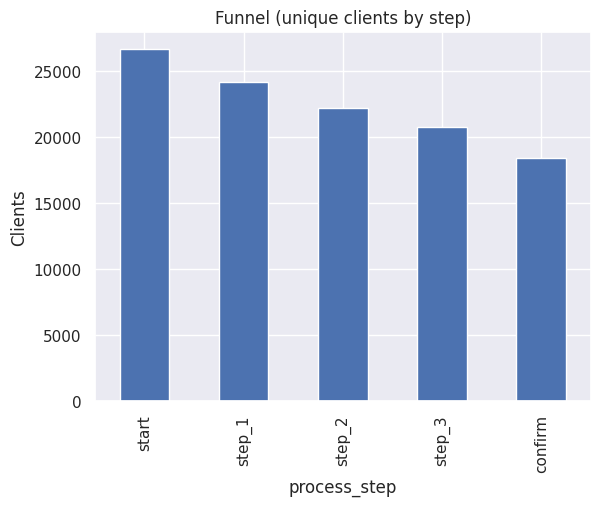

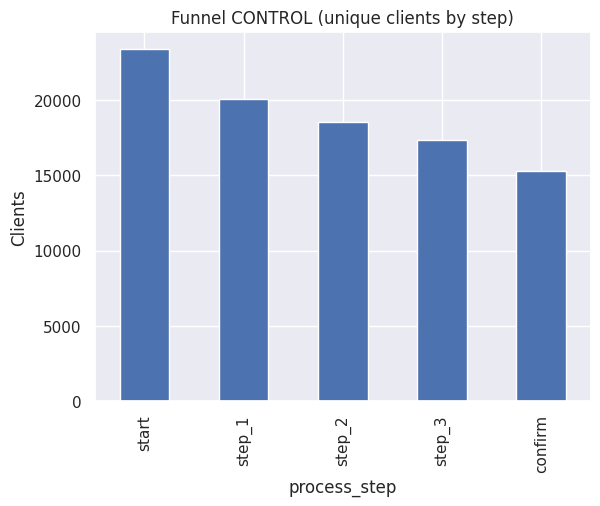

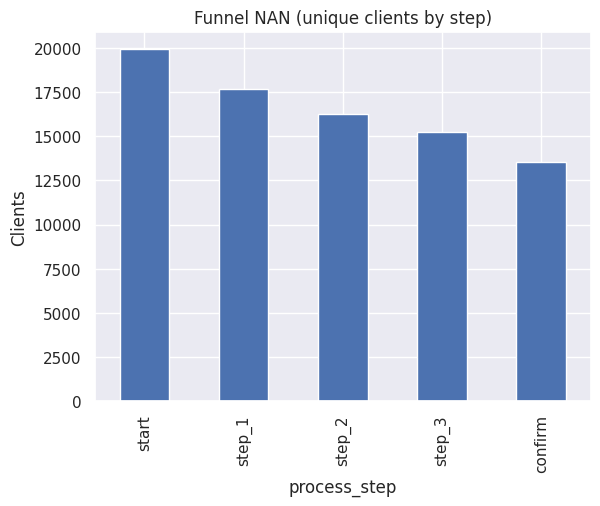

In [ ]:
#TEST
step_clients_test["unique_clients"].plot(kind="bar", title="Funnel (unique clients by step)")
plt.ylabel("Clients"); plt.show()

# CONTROL
step_clients_control["unique_clients"].plot(kind="bar", title="Funnel CONTROL (unique clients by step)")
plt.ylabel("Clients"); plt.show()

# NAN
step_clients_nan["unique_clients"].plot(kind="bar", title="Funnel NAN (unique clients by step)")
plt.ylabel("Clients"); plt.show()


In [ ]:
#----- TEST -------- VARIA LIGERAMENTE CON RESPECTO AL DE MÁS ARRIBA, ES POSIBLE QUE ESTE COGIENDO MAL LOS CONFIRM

# per client
per_client_test = (w_test.groupby("client_id")
              .agg(events=("process_step","count"),
                   visits=("visit_id","nunique"),
                   max_step=("step_order","max"),
                   completed=("process_step", lambda s: (s=="confirm").any()))
              .reset_index())

client_conv_test = per_client_test["completed"].mean()
print(f"Client completion rate: {client_conv_test:.2%}")

# per visit
per_visit_test = (w_test.groupby("visit_id")
             .agg(client_id=("client_id","first"),
                  completed=("process_step", lambda s: (s=="confirm").any()))
             .reset_index())
visit_conv_test = per_visit_test["completed"].mean()
print(f"Visit completion rate:  {visit_conv_test:.2%}")

#----- CONTROL --------
per_client_control = (w_control.groupby("client_id")
    .agg(events=("process_step","count"),
         visits=("visit_id","nunique"),
         max_step=("step_order","max"),
         completed=("process_step", lambda s: (s=="confirm").any()))
    .reset_index())

client_conv_control = per_client_control["completed"].mean()
print(f"Client completion rate (CONTROL): {client_conv_control:.2%}")

per_visit_control = (w_control.groupby("visit_id")
    .agg(client_id=("client_id","first"),
         completed=("process_step", lambda s: (s=="confirm").any()))
    .reset_index())

visit_conv_control = per_visit_control["completed"].mean()
print(f"Visit completion rate (CONTROL):  {visit_conv_control:.2%}")


#----- NAN --------
per_client_nan = (w_nan.groupby("client_id")
    .agg(events=("process_step","count"),
         visits=("visit_id","nunique"),
         max_step=("step_order","max"),
         completed=("process_step", lambda s: (s=="confirm").any()))
    .reset_index())

client_conv_nan = per_client_nan["completed"].mean()
print(f"Client completion rate (NAN): {client_conv_nan:.2%}")

per_visit_nan = (w_nan.groupby("visit_id")
    .agg(client_id=("client_id","first"),
         completed=("process_step", lambda s: (s=="confirm").any()))
    .reset_index())

visit_conv_nan = per_visit_nan["completed"].mean()
print(f"Visit completion rate (NAN):  {visit_conv_nan:.2%}")


Client completion rate: 69.29%
Visit completion rate:  58.52%
Client completion rate (CONTROL): 65.59%
Visit completion rate (CONTROL):  49.85%
Client completion rate (NAN): 68.02%
Visit completion rate (NAN):  54.72%


In [ ]:
# ------ TEST --------

# 1) One row per visit
visit_starts_test = (w_test.sort_values("date_time")
                  .groupby("visit_id")
                  .agg(client_id=("client_id", "first"),
                       start_time=("date_time", "first"))
                  .reset_index())

# 2) Order visits within each client by start_time
visit_starts_test = visit_starts_test.sort_values(["client_id", "start_time"])
visit_starts_test["visit_num"] = visit_starts_test.groupby("client_id").cumcount() + 1

# 3) Merge
v_test = per_visit_test.merge(visit_starts_test[["visit_id", "visit_num"]], on="visit_id", how="left")

# 4) Simple stats
first_rate_test = v_test.loc[v_test["visit_num"] == 1, "completed"].mean()
later_rate_test = v_test.loc[v_test["visit_num"] > 1,  "completed"].mean()
share_first_test = (v_test[(v_test["visit_num"] == 1) & (v_test["completed"])].shape[0] /
               v_test[v_test["completed"]].shape[0] if (v_test["completed"].any()) else 0.0)

print(f"Completion on 1st visit: {first_rate_test:.2%}")
print(f"Completion on later visits: {later_rate_test:.2%}")
print(f"Share of all completions that happen on 1st visit: {share_first_test:.2%}")

# ----- CONTROL -----

# 1) One row per visit
visit_starts_control = (w_control.sort_values("date_time")
    .groupby("visit_id")
    .agg(client_id=("client_id", "first"),
         start_time=("date_time", "first"))
    .reset_index())

# 2) Order visits within each client by start_time
visit_starts_control = visit_starts_control.sort_values(["client_id", "start_time"])
visit_starts_control["visit_num"] = visit_starts_control.groupby("client_id").cumcount() + 1

# 3) Merge
v_control = per_visit_control.merge(visit_starts_control[["visit_id", "visit_num"]],
                                    on="visit_id", how="left")

# 4) Simple stats
first_rate_control = v_control.loc[v_control["visit_num"] == 1, "completed"].mean()
later_rate_control = v_control.loc[v_control["visit_num"] > 1,  "completed"].mean()
share_first_control = (
    v_control[(v_control["visit_num"] == 1) & (v_control["completed"])].shape[0] /
    v_control[v_control["completed"]].shape[0] if v_control["completed"].any() else 0.0
)

print(f"Completion on 1st visit (CONTROL): {first_rate_control:.2%}")
print(f"Completion on later visits (CONTROL): {later_rate_control:.2%}")
print(f"Share of all completions that happen on 1st visit (CONTROL): {share_first_control:.2%}")

# ----- NAN -----

# 1) One row per visit
visit_starts_nan = (w_nan.sort_values("date_time")
    .groupby("visit_id")
    .agg(client_id=("client_id", "first"),
         start_time=("date_time", "first"))
    .reset_index())

# 2) Order visits within each client by start_time
visit_starts_nan = visit_starts_nan.sort_values(["client_id", "start_time"])
visit_starts_nan["visit_num"] = visit_starts_nan.groupby("client_id").cumcount() + 1

# 3) Merge
v_nan = per_visit_nan.merge(visit_starts_nan[["visit_id", "visit_num"]],
                            on="visit_id", how="left")

# 4) Simple stats
first_rate_nan = v_nan.loc[v_nan["visit_num"] == 1, "completed"].mean()
later_rate_nan = v_nan.loc[v_nan["visit_num"] > 1,  "completed"].mean()
share_first_nan = (
    v_nan[(v_nan["visit_num"] == 1) & (v_nan["completed"])].shape[0] /
    v_nan[v_nan["completed"]].shape[0] if v_nan["completed"].any() else 0.0
)

print(f"Completion on 1st visit (NAN): {first_rate_nan:.2%}")
print(f"Completion on later visits (NAN): {later_rate_nan:.2%}")
print(f"Share of all completions that happen on 1st visit (NAN): {share_first_nan:.2%}")



Completion on 1st visit: 57.09%
Completion on later visits: 62.27%
Share of all completions that happen on 1st visit: 70.72%
Completion on 1st visit (CONTROL): 53.33%
Completion on later visits (CONTROL): 40.47%
Share of all completions that happen on 1st visit (CONTROL): 78.05%
Completion on 1st visit (NAN): 55.52%
Completion on later visits (NAN): 52.62%
Share of all completions that happen on 1st visit (NAN): 73.42%


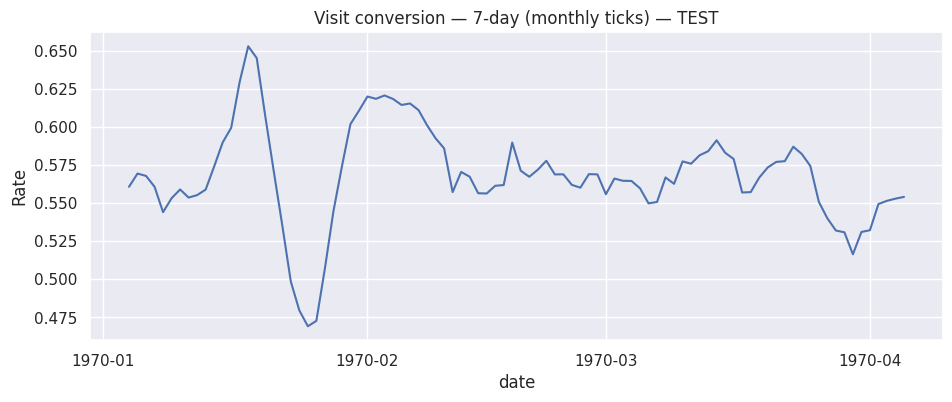

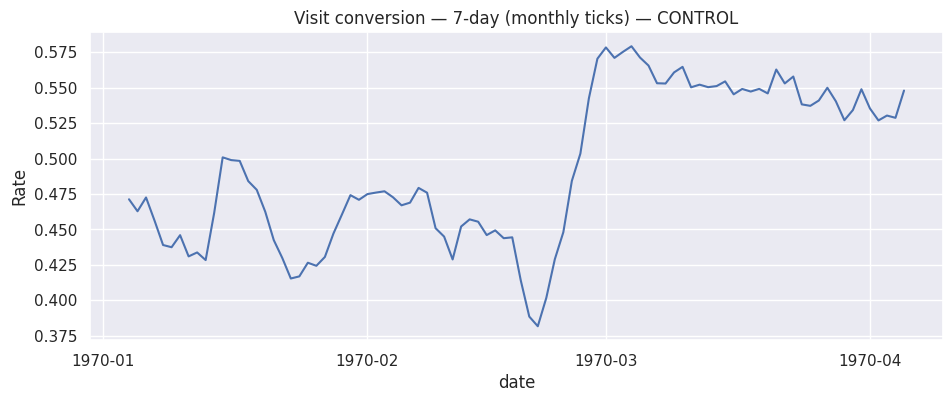

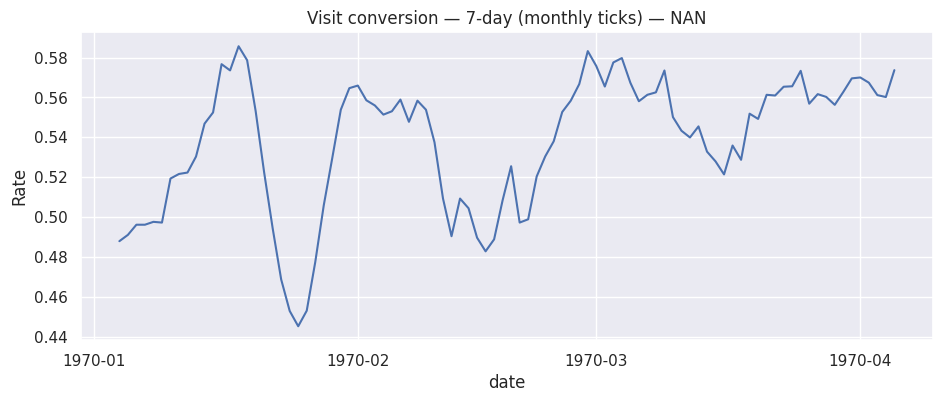

In [ ]:
import matplotlib.dates as mdates

def make_daily(w):
    per_visit = (w.sort_values("date_time")
                   .groupby("visit_id")
                   .agg(start_time=("date_time","first"),
                        completed=("process_step", lambda s: (s=="confirm").any()))
                   .reset_index())
    per_visit = per_visit.dropna(subset=["start_time"])
    per_visit["date"] = per_visit["start_time"].dt.floor("D")
    daily = (per_visit.groupby("date")["completed"]
                     .mean()
                     .rename("visit_conv")
                     .reset_index()
                     .sort_values("date"))
    return daily

def plot_daily(daily, title_suffix):
    ax = daily["visit_conv"].rolling(7, center=True).mean().plot(figsize=(11,4))
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.title(f"Visit conversion — 7-day (monthly ticks) — {title_suffix}")
    plt.ylabel("Rate"); plt.xlabel("date")
    plt.show()

# TEST
daily_test = make_daily(w_test)
plot_daily(daily_test, "TEST")

# CONTROL
daily_control = make_daily(w_control)
plot_daily(daily_control, "CONTROL")

# NAN
daily_nan = make_daily(w_nan)
plot_daily(daily_nan, "NAN")


TEST — TTC summary (min)
count    17880.00
mean         6.26
std          7.70
min          0.60
25%          2.47
50%          3.97
75%          7.03
max        300.25
Name: ttc_min, dtype: float64


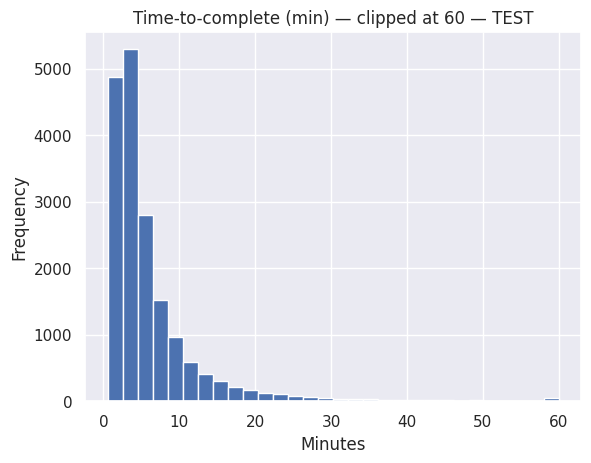

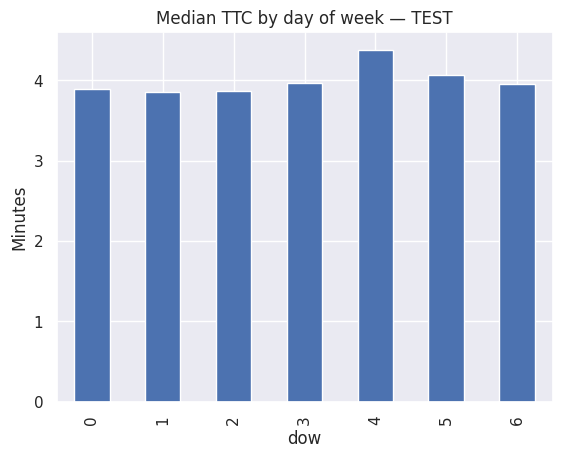

In [ ]:
# ----- TEST -----
w = w_test

first_start   = w.loc[w["process_step"]=="start"].groupby("visit_id")["date_time"].min()
first_confirm = w.loc[w["process_step"]=="confirm"].groupby("visit_id")["date_time"].min()

ttc_min = ((first_confirm - first_start).dropna().dt.total_seconds() / 60)
ttc_df  = ttc_min[ttc_min >= 0].rename("ttc_min").reset_index()

start_df = first_start.rename("start_time").reset_index()
wk_test = ttc_df.merge(start_df, on="visit_id", how="left")
wk_test["dow"] = wk_test["start_time"].dt.dayofweek  # 0=Mon ... 6=Sun

print("TEST — TTC summary (min)")
print(wk_test["ttc_min"].describe().round(2))

plt.figure()
wk_test["ttc_min"].clip(upper=60).plot(kind="hist", bins=30, title="Time-to-complete (min) — clipped at 60 — TEST")
plt.xlabel("Minutes"); plt.show()

wk_test.groupby("dow")["ttc_min"].median().plot(kind="bar", title="Median TTC by day of week — TEST")
plt.ylabel("Minutes"); plt.show()


CONTROL — TTC summary (min)
count    14883.00
mean         6.53
std          7.03
min          0.55
25%          2.88
50%          4.53
75%          7.55
max        284.53
Name: ttc_min, dtype: float64


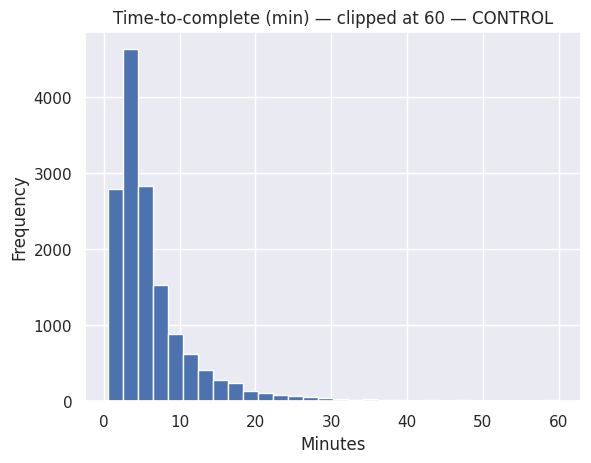

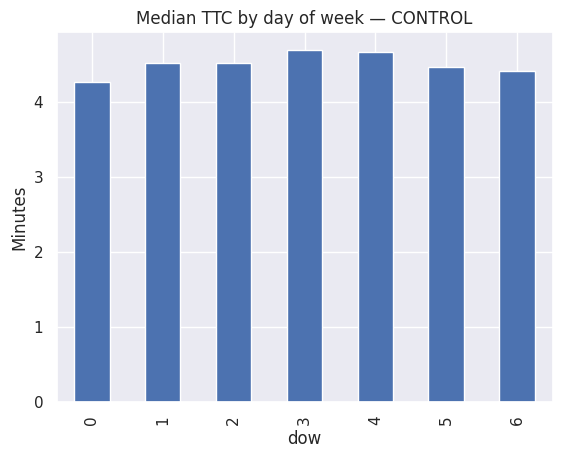

In [ ]:
# ----- CONTROL -----
w = w_control

first_start   = w.loc[w["process_step"]=="start"].groupby("visit_id")["date_time"].min()
first_confirm = w.loc[w["process_step"]=="confirm"].groupby("visit_id")["date_time"].min()

ttc_min = ((first_confirm - first_start).dropna().dt.total_seconds() / 60)
ttc_df  = ttc_min[ttc_min >= 0].rename("ttc_min").reset_index()

start_df = first_start.rename("start_time").reset_index()
wk_control = ttc_df.merge(start_df, on="visit_id", how="left")
wk_control["dow"] = wk_control["start_time"].dt.dayofweek

print("CONTROL — TTC summary (min)")
print(wk_control["ttc_min"].describe().round(2))

plt.figure()
wk_control["ttc_min"].clip(upper=60).plot(kind="hist", bins=30, title="Time-to-complete (min) — clipped at 60 — CONTROL")
plt.xlabel("Minutes"); plt.show()

wk_control.groupby("dow")["ttc_min"].median().plot(kind="bar", title="Median TTC by day of week — CONTROL")
plt.ylabel("Minutes"); plt.show()


NAN — TTC summary (min)
count    13134.00
mean         6.40
std          7.27
min          0.57
25%          2.63
50%          4.20
75%          7.43
max        167.72
Name: ttc_min, dtype: float64


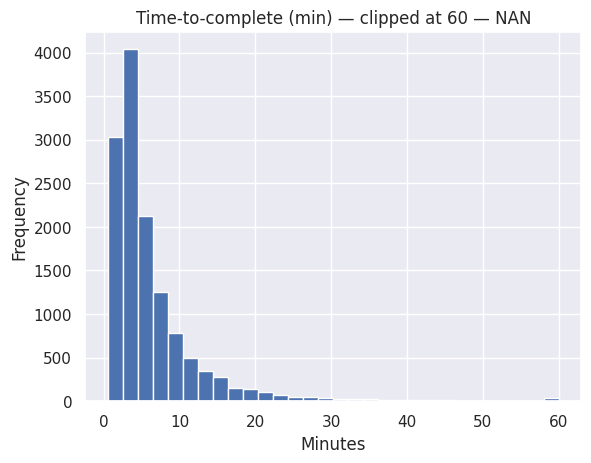

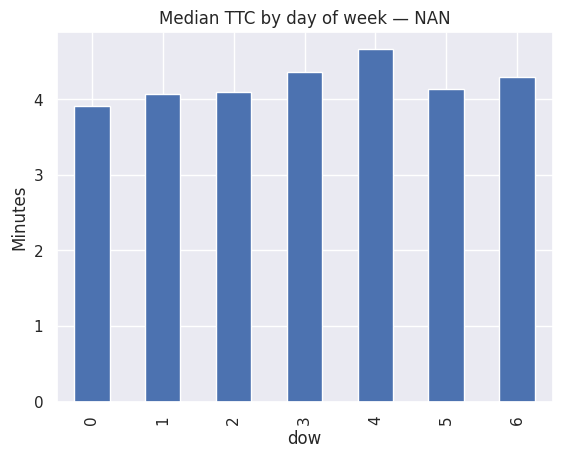

In [ ]:
# ----- NAN -----
w = w_nan

first_start   = w.loc[w["process_step"]=="start"].groupby("visit_id")["date_time"].min()
first_confirm = w.loc[w["process_step"]=="confirm"].groupby("visit_id")["date_time"].min()

ttc_min = ((first_confirm - first_start).dropna().dt.total_seconds() / 60)
ttc_df  = ttc_min[ttc_min >= 0].rename("ttc_min").reset_index()

start_df = first_start.rename("start_time").reset_index()
wk_nan = ttc_df.merge(start_df, on="visit_id", how="left")
wk_nan["dow"] = wk_nan["start_time"].dt.dayofweek

print("NAN — TTC summary (min)")
print(wk_nan["ttc_min"].describe().round(2))

plt.figure()
wk_nan["ttc_min"].clip(upper=60).plot(kind="hist", bins=30, title="Time-to-complete (min) — clipped at 60 — NAN")
plt.xlabel("Minutes"); plt.show()

wk_nan.groupby("dow")["ttc_min"].median().plot(kind="bar", title="Median TTC by day of week — NAN")
plt.ylabel("Minutes"); plt.show()


In [ ]:
# ----- TEST -----
first_times_test = (w_test[w_test["process_step"].isin(order)]
                   .groupby(["visit_id","process_step"])["date_time"].min().unstack())

dur_test = pd.DataFrame({
    "start→1":   (first_times_test["step_1"]   - first_times_test["start"]).dt.total_seconds()/60,
    "1→2":       (first_times_test["step_2"]   - first_times_test["step_1"]).dt.total_seconds()/60,
    "2→3":       (first_times_test["step_3"]   - first_times_test["step_2"]).dt.total_seconds()/60,
    "3→confirm": (first_times_test["confirm"]  - first_times_test["step_3"]).dt.total_seconds()/60
}).dropna(how="all")

dur_test.median().round(2)

# ----- CONTROL -----
first_times_control = (w_control[w_control["process_step"].isin(order)]
                      .groupby(["visit_id","process_step"])["date_time"].min().unstack())

dur_control = pd.DataFrame({
    "start→1":   (first_times_control["step_1"]   - first_times_control["start"]).dt.total_seconds()/60,
    "1→2":       (first_times_control["step_2"]   - first_times_control["step_1"]).dt.total_seconds()/60,
    "2→3":       (first_times_control["step_3"]   - first_times_control["step_2"]).dt.total_seconds()/60,
    "3→confirm": (first_times_control["confirm"]  - first_times_control["step_3"]).dt.total_seconds()/60
}).dropna(how="all")

dur_control.median().round(2)

# ----- NAN -----
first_times_nan = (w_nan[w_nan["process_step"].isin(order)]
                  .groupby(["visit_id","process_step"])["date_time"].min().unstack())

dur_nan = pd.DataFrame({
    "start→1":   (first_times_nan["step_1"]   - first_times_nan["start"]).dt.total_seconds()/60,
    "1→2":       (first_times_nan["step_2"]   - first_times_nan["step_1"]).dt.total_seconds()/60,
    "2→3":       (first_times_nan["step_3"]   - first_times_nan["step_2"]).dt.total_seconds()/60,
    "3→confirm": (first_times_nan["confirm"]  - first_times_nan["step_3"]).dt.total_seconds()/60
}).dropna(how="all")

dur_nan.median().round(2)

,0
start→1,0.25
1→2,0.45
2→3,1.25
3→confirm,1.18


In [ ]:
# ----- TEST -----
seq_test = (w_test.sort_values(["visit_id","date_time"])
             .groupby("visit_id")["process_step"]
             .apply(lambda s: " > ".join(pd.unique(s))))
top_paths_test = seq_test.value_counts().head(10)
top_paths_test

# ----- CONTROL -----
seq_control = (w_control.sort_values(["visit_id","date_time"])
                .groupby("visit_id")["process_step"]
                .apply(lambda s: " > ".join(pd.unique(s))))
top_paths_control = seq_control.value_counts().head(10)
top_paths_control

# ----- NAN -----
seq_nan = (w_nan.sort_values(["visit_id","date_time"])
            .groupby("visit_id")["process_step"]
            .apply(lambda s: " > ".join(pd.unique(s))))
top_paths_nan = seq_nan.value_counts().head(10)
top_paths_nan

,count
process_step,
start > step_1 > step_2 > step_3 > confirm,13038
start,5123
start > step_1,2872
start > step_1 > step_2 > step_3,2636
start > step_1 > step_2,1758
confirm,1683
step_1 > step_2 > step_3 > confirm,147
step_3 > confirm,132
step_2 > step_3 > confirm,61


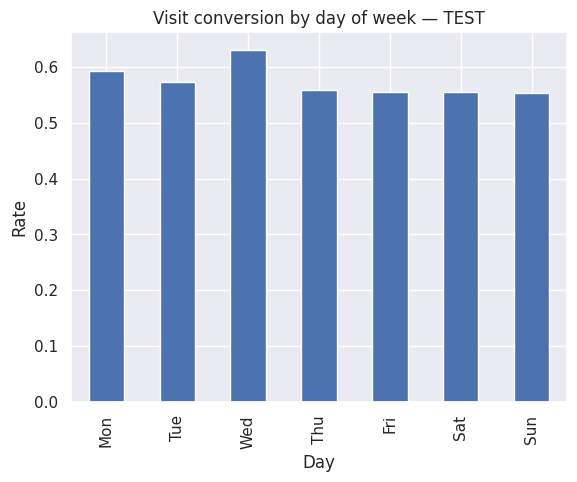

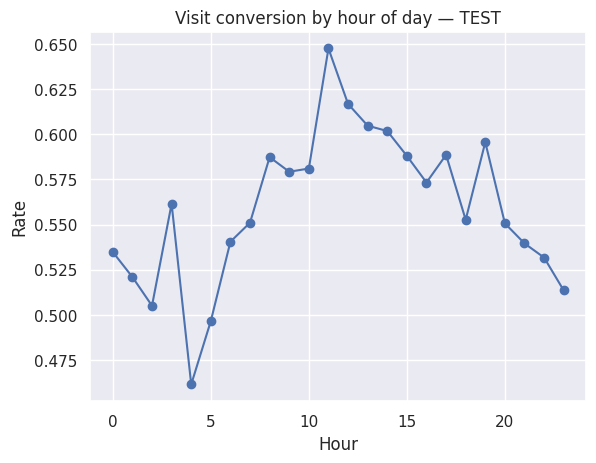

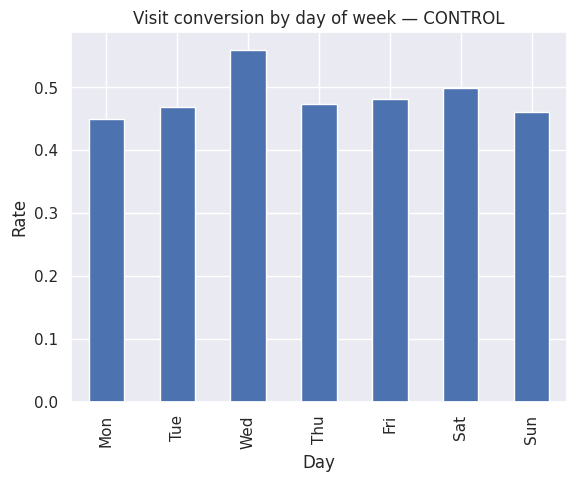

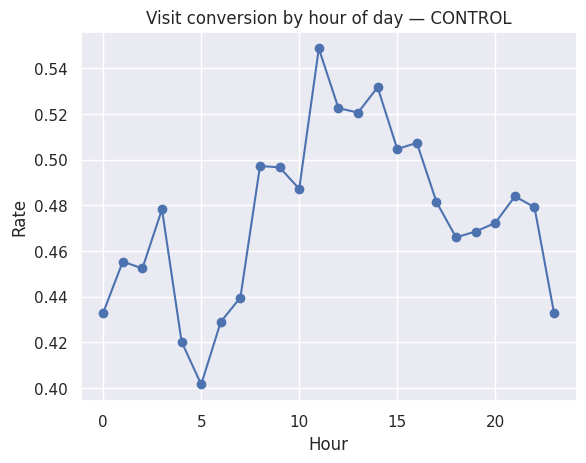

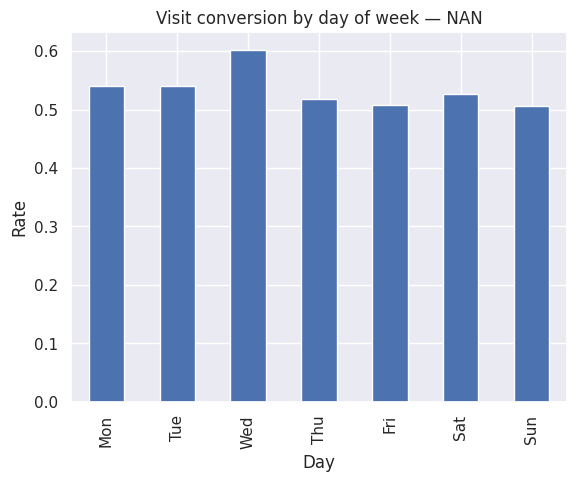

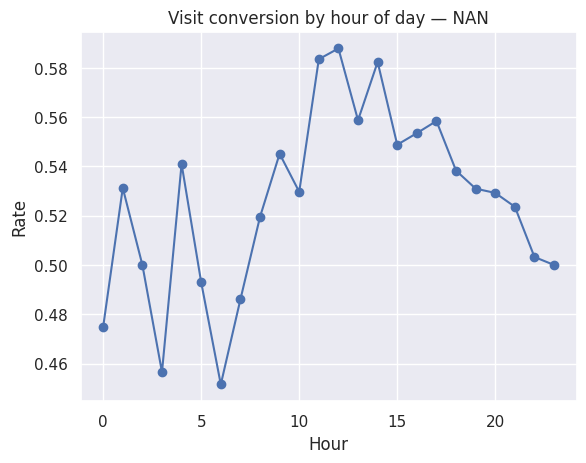

In [ ]:
# --- TEST ---
vts_test = (w_test.groupby("visit_id")
    .agg(completed=("process_step", lambda s: (s=="confirm").any()),
         dt=("date_time","min"))
    .dropna())

vts_test["dow"]  = vts_test["dt"].dt.dayofweek   # 0=Mon … 6=Sun
vts_test["hour"] = vts_test["dt"].dt.hour

dow_map = {0:"Mon",1:"Tue",2:"Wed",3:"Thu",4:"Fri",5:"Sat",6:"Sun"}

day_conv_test = (vts_test.assign(dow_name=vts_test["dow"].map(dow_map))
                   .groupby("dow_name")["completed"].mean()
                   .reindex(["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]))
day_conv_test.plot(kind="bar", title="Visit conversion by day of week — TEST")
plt.ylabel("Rate"); plt.xlabel("Day"); plt.show()

hour_conv_test = vts_test.groupby("hour")["completed"].mean()
hour_conv_test.plot(marker="o", title="Visit conversion by hour of day — TEST")
plt.ylabel("Rate"); plt.xlabel("Hour"); plt.show()


# --- CONTROL ---
vts_control = (w_control.groupby("visit_id")
    .agg(completed=("process_step", lambda s: (s=="confirm").any()),
         dt=("date_time","min"))
    .dropna())

vts_control["dow"]  = vts_control["dt"].dt.dayofweek
vts_control["hour"] = vts_control["dt"].dt.hour

day_conv_control = (vts_control.assign(dow_name=vts_control["dow"].map(dow_map))
                      .groupby("dow_name")["completed"].mean()
                      .reindex(["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]))
day_conv_control.plot(kind="bar", title="Visit conversion by day of week — CONTROL")
plt.ylabel("Rate"); plt.xlabel("Day"); plt.show()

hour_conv_control = vts_control.groupby("hour")["completed"].mean()
hour_conv_control.plot(marker="o", title="Visit conversion by hour of day — CONTROL")
plt.ylabel("Rate"); plt.xlabel("Hour"); plt.show()


# --- NAN ---
vts_nan = (w_nan.groupby("visit_id")
    .agg(completed=("process_step", lambda s: (s=="confirm").any()),
         dt=("date_time","min"))
    .dropna())

vts_nan["dow"]  = vts_nan["dt"].dt.dayofweek
vts_nan["hour"] = vts_nan["dt"].dt.hour

day_conv_nan = (vts_nan.assign(dow_name=vts_nan["dow"].map(dow_map))
                  .groupby("dow_name")["completed"].mean()
                  .reindex(["Mon","Tue","Wed","Thu","Fri","Sat","Sun"]))
day_conv_nan.plot(kind="bar", title="Visit conversion by day of week — NAN")
plt.ylabel("Rate"); plt.xlabel("Day"); plt.show()

hour_conv_nan = vts_nan.groupby("hour")["completed"].mean()
hour_conv_nan.plot(marker="o", title="Visit conversion by hour of day — NAN")
plt.ylabel("Rate"); plt.xlabel("Hour"); plt.show()
